# Linear models with a single factor explanatory variable having three or more levels (One-way analysis of variance)

本节需要的包：


In [2]:
require(s20x)
require(dplyr)
require(emmeans)


载入需要的程辑包：s20x

Warning message:
"程辑包's20x'是用R版本4.2.3 来建造的"


## Example with a 5-level explanatory factor variable

The explanatory factor variable was group, with five levels:

- G1 males living alone,
- G2 males living with one interested female,
- G3 males living with eight interested females,
- G4 males living with one uninterested female, and
- G5 males living with eight uninterested females.

Let us take a look at the data:

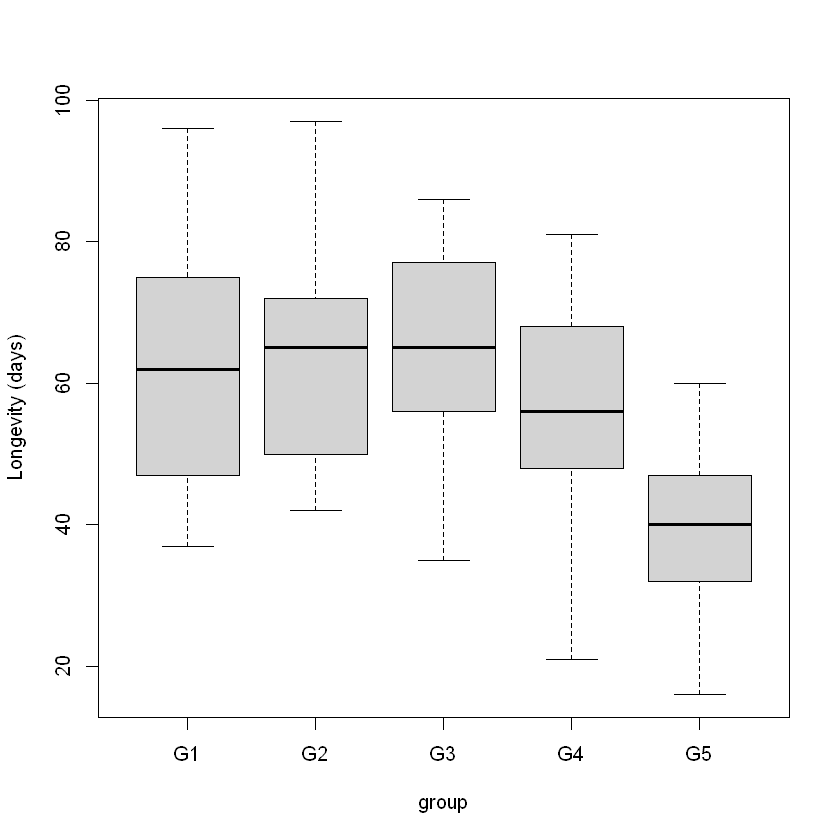

In [3]:
library(s20x)
Fruitfly.df <- read.csv("../data/Fruitfly.csv", header = T)
Fruitfly.df$group <- factor(Fruitfly.df$group)
boxplot(days ~ group, data = Fruitfly.df, ylab = "Longevity (days)")


As seen in previous chapters that involved categorical explanatory variables, our model specification uses indicator variables. In this case:

$$
\text{days}=\beta_0+\beta_1\times\mathtt{D2}+\beta_2\times\mathtt{D3}+\beta_3\times\mathtt{D4}+\beta_4\times\mathtt{D5}+\epsilon
$$


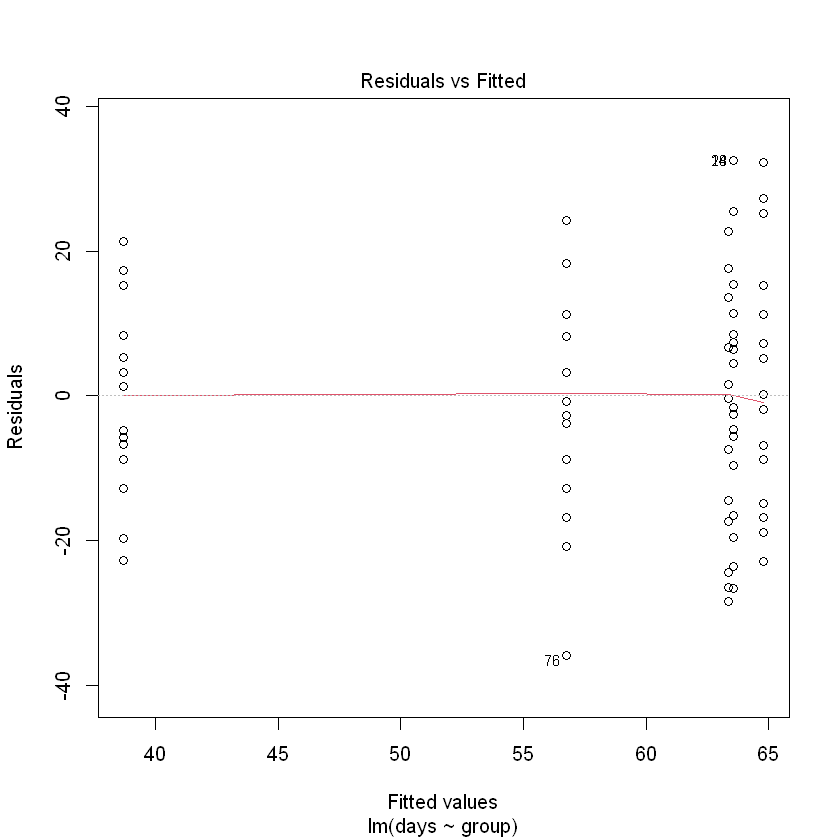

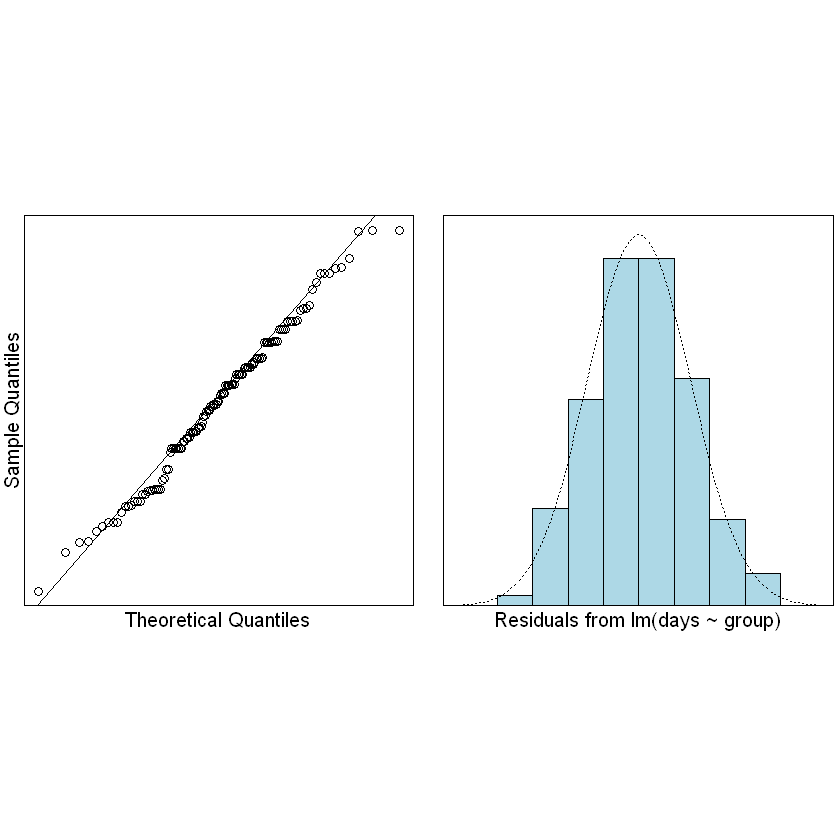

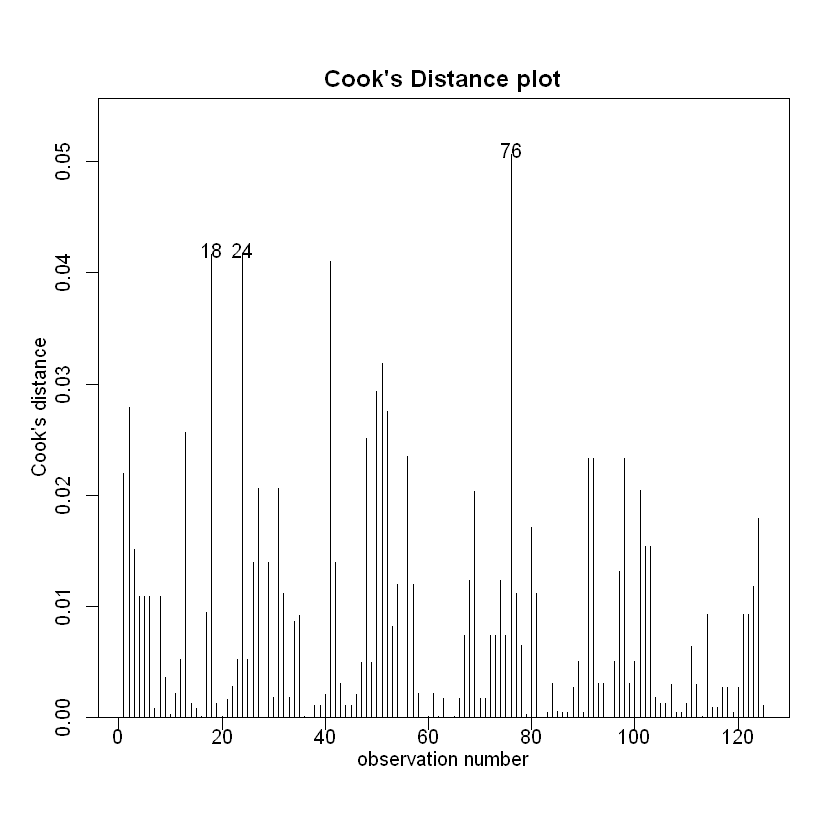

In [4]:
Fruitfly.fit <- lm(days ~ group, data = Fruitfly.df)
plot(Fruitfly.fit, which = 1)
normcheck(Fruitfly.fit)
cooks20x(Fruitfly.fit)


We can trust the fitted model. What can we conclude?

In [5]:
anova(Fruitfly.fit)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
group,4,11939.28,2984.8200,13.61195,3.515622e-09
Residuals,120,26313.52,219.2793,NA,NA


## Interpreting the output

In [6]:
summary(Fruitfly.fit)



Call:
lm(formula = days ~ group, data = Fruitfly.df)

Residuals:
   Min     1Q Median     3Q    Max 
-35.76  -8.76   0.20  11.20  32.44 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   63.560      2.962  21.461  < 2e-16 ***
groupG2        1.240      4.188   0.296    0.768    
groupG3       -0.200      4.188  -0.048    0.962    
groupG4       -6.800      4.188  -1.624    0.107    
groupG5      -24.840      4.188  -5.931 2.98e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.81 on 120 degrees of freedom
Multiple R-squared:  0.3121,	Adjusted R-squared:  0.2892 
F-statistic: 13.61 on 4 and 120 DF,  p-value: 3.516e-09


Some researchers like to examine the group means and their deviations from the overall (or so-called“grand”) mean. 一些研究人员喜欢检查群体平均数及其与总体（或所谓的“大”）平均数的偏差。These deviations are commonly called group “effects”.

In [8]:
grand.mean <- mean(Fruitfly.df$days)
grand.mean


[1] 57.44

The estimated group means are just the sample means within each group. 7 We can quickly obtain these using the incredibly useful `dplyr` package:估计组意味着只是在每组样本均值。我们可以快速获得这些使用非常有用的包:

In [9]:
library(dplyr())
Df <- Fruitfly.df |>
    group_by(group) |>
    summarize(group.mean = mean(days)) |>
    data.frame()


Warning message:
"程辑包'dplyr'是用R版本4.2.3 来建造的"

载入程辑包：'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




The estimated group means are:

In [10]:
Df$group.mean
Df$group.mean - grand.mean


[1] 63.56 64.80 63.36 56.76 38.72

[1]   6.12   7.36   5.92  -0.68 -18.72

## The multiple comparisons problem

The following R code fits a simple linear regression model to iid (independent and identically distributed) normal data.

In [11]:
x <- 1:30 ## Our explanatory variable
y <- rnorm(30) ## y has NO relationship with x
summary(lm(y ~ x))$coef ## Print only the coefficient table


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.51763352,0.37980672,-1.3628867,0.1837793
x,0.02053823,0.02139403,0.9599985,0.3452731


如果多次运行此代码，会发现大约5%的时间斜率会满足 p-value < 0.05。

Let’s get simultaneous 95% confidence intervals for all 10 comparisons via the `pairs` and `emmeans` functions of the package.

In [12]:
library(emmeans)
Fruitfly.pairs = pairs(emmeans(Fruitfly.fit, ~group, infer = T))
Fruitfly.pairs


Warning message:
"程辑包'emmeans'是用R版本4.2.3 来建造的"


 contrast estimate   SE  df t.ratio p.value
 G1 - G2     -1.24 4.19 120  -0.296  0.9983
 G1 - G3      0.20 4.19 120   0.048  1.0000
 G1 - G4      6.80 4.19 120   1.624  0.4854
 G1 - G5     24.84 4.19 120   5.931  <.0001
 G2 - G3      1.44 4.19 120   0.344  0.9970
 G2 - G4      8.04 4.19 120   1.920  0.3127
 G2 - G5     26.08 4.19 120   6.227  <.0001
 G3 - G4      6.60 4.19 120   1.576  0.5158
 G3 - G5     24.64 4.19 120   5.883  <.0001
 G4 - G5     18.04 4.19 120   4.307  0.0003

P value adjustment: tukey method for comparing a family of 5 estimates 